In [1]:
import numpy as np # linear algebra
import numpy.linalg

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(20,8.27)})

In [2]:
!pip install faraway

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import faraway.datasets.fat

fat = faraway.datasets.fat.load()
fat.head()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
print(faraway.datasets.fat.DESCR)


Percentage of Body Fat and Body Measurements

Description

Age, weight, height, and 10 body circumference measurements are recorded for 252 men. Each man's percentage of body fat was accurately estimated by an underwater weighing technique.

Usage

data(fat)
Format

A data frame with 252 observations on the following 18 variables.

brozek
Percent body fat using Brozek's equation, 457/Density - 414.2

siri
Percent body fat using Siri's equation, 495/Density - 450

density
Density (gm/$cm^3$)

age
Age (yrs)

weight
Weight (lbs)

height
Height (inches)

adipos
Adiposity index = Weight/Height$^2$ (kg/$m^2$)

free
Fat Free Weight = (1 - fraction of body fat) * Weight, using Brozek's formula (lbs)

neck
Neck circumference (cm)

chest
Chest circumference (cm)

abdom
Abdomen circumference (cm) at the umbilicus and level with the iliac crest

hip
Hip circumference (cm)

thigh
Thigh circumference (cm)

knee
Knee circumference (cm)

ankle
Ankle circumference (cm)

biceps
Extended biceps circumfe

In [5]:
fat.insert(0, "Intercept", 1)
x0 = pd.DataFrame(
    fat.iloc[:, np.r_[0, 4:7, 9:19]].median()
).T
x0

,Intercept,age,weight,height,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0,43.0,176.5,70.0,38.0,99.65,90.95,99.3,59.0,38.5,22.8,32.05,28.7,18.3


In [6]:
import faraway.utils

lmod = smf.ols(
    "brozek ~ age + weight + height + neck +" +
    "chest + abdom + hip + thigh +"  + 
    "knee + ankle + biceps + forearm + wrist", 
    data=fat
).fit()
lmod.sumary()

            coefs stderr tvalues pvalues
Intercept -15.293 16.070   -0.95  0.3423
age         0.057  0.030    1.90  0.0593
weight     -0.080  0.050   -1.62  0.1066
height     -0.065  0.089   -0.73  0.4683
neck       -0.438  0.215   -2.03  0.0433
chest      -0.024  0.092   -0.26  0.7974
abdom       0.885  0.080   11.06  0.0000
hip        -0.198  0.135   -1.47  0.1434
thigh       0.232  0.134    1.73  0.0842
knee       -0.012  0.224   -0.05  0.9585
ankle       0.164  0.205    0.80  0.4261
biceps      0.153  0.159    0.96  0.3360
forearm     0.430  0.184    2.33  0.0204
wrist      -1.477  0.496   -2.98  0.0032

n=252 p=14 Residual SD=3.988 R-squared=0.75


In [8]:
lmod.get_prediction(x0).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,17.49322,0.278665,16.944255,18.042185,9.61783,25.36861


In [10]:
x1 = pd.DataFrame(
    fat.iloc[:, np.r_[0, 4:7, 9:19]].quantile(0.95)
).T
x1

,Intercept,age,weight,height,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0.95,1.0,67.0,225.65,74.5,41.845,116.34,110.76,112.125,68.545,42.645,25.445,37.2,31.745,19.8


In [11]:
lmod.get_prediction(x1).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,30.018044,0.988499,28.07072,31.965369,21.924066,38.112023


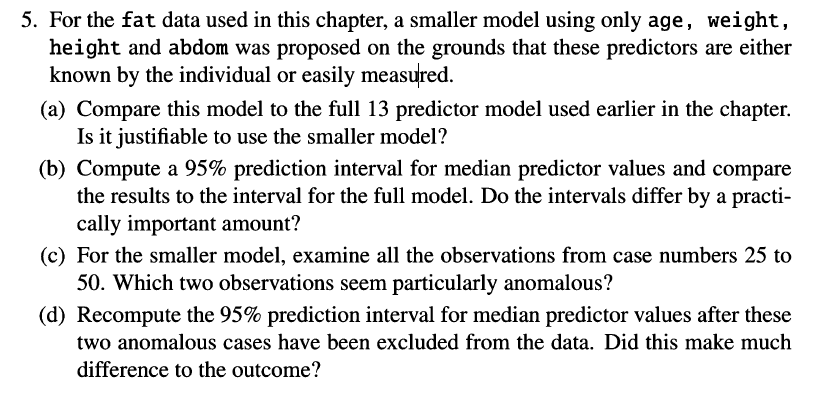

In [12]:
lmod_cut = smf.ols(
    "brozek ~ age + weight + height + abdom",
    data=fat
).fit()

lmod_cut.sumary()

            coefs stderr tvalues pvalues
Intercept -32.770  6.542   -5.01  0.0000
age        -0.007  0.024   -0.29  0.7723
weight     -0.124  0.025   -4.94  0.0000
height     -0.117  0.083   -1.41  0.1596
abdom       0.890  0.067   13.23  0.0000

n=252 p=5 Residual SD=4.126 R-squared=0.72


It is justifiable to use this model. The difference in $R^2$ and $SD$ is not that big

In [13]:
lmod_cut.get_prediction(x0).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,17.840278,0.266076,17.31621,18.364345,9.696631,25.983924


The difference in the length for obs is <1%; not a big deal

In [14]:
lmod_cut.get_prediction(x1).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,28.690038,0.727681,27.256785,30.12329,20.437854,36.942221


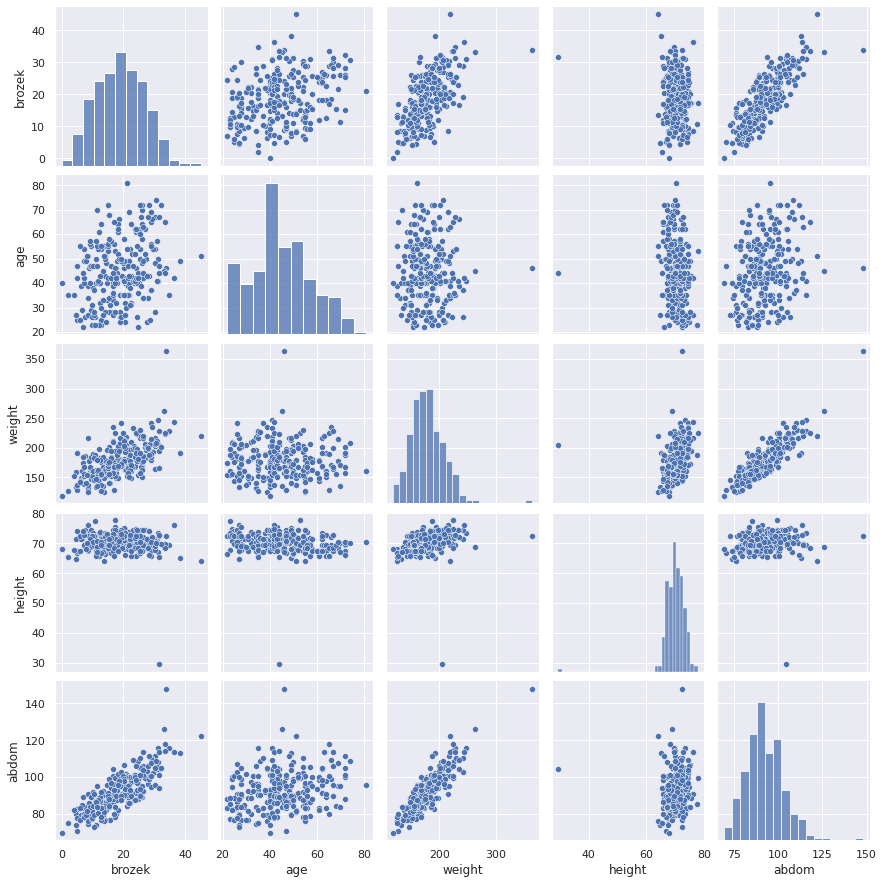

In [15]:
fat_cut = fat.loc[:, ["brozek", "age", "weight", "height", "abdom"]]
sns.pairplot(fat_cut)

In [16]:
fat_cut.iloc[:50, :][fat_cut["abdom"] > 120]

/tmp/ipykernel_74462/1032908199.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fat_cut.iloc[:50, :][fat_cut["abdom"] > 120]


,brozek,age,weight,height,abdom
38,33.8,46,363.15,72.25,148.1
40,33.1,45,262.75,68.75,126.2


## Diagnostics

In [17]:
%run utils.ipynb

### Multicollinearity

In [21]:
lmod.sumary()

            coefs stderr tvalues pvalues
Intercept -15.293 16.070   -0.95  0.3423
age         0.057  0.030    1.90  0.0593
weight     -0.080  0.050   -1.62  0.1066
height     -0.065  0.089   -0.73  0.4683
neck       -0.438  0.215   -2.03  0.0433
chest      -0.024  0.092   -0.26  0.7974
abdom       0.885  0.080   11.06  0.0000
hip        -0.198  0.135   -1.47  0.1434
thigh       0.232  0.134    1.73  0.0842
knee       -0.012  0.224   -0.05  0.9585
ankle       0.164  0.205    0.80  0.4261
biceps      0.153  0.159    0.96  0.3360
forearm     0.430  0.184    2.33  0.0204
wrist      -1.477  0.496   -2.98  0.0032

n=252 p=14 Residual SD=3.988 R-squared=0.75


In [18]:
get_cond_nums(lmod)

array([1.78375276e+04, 5.55670044e+02, 2.68207467e+02, 2.28158329e+02,
       2.13008677e+02, 1.92615221e+02, 1.75286972e+02, 1.37897892e+02,
       1.00632783e+02, 8.35917083e+01, 5.86064667e+01, 2.53045287e+01,
       1.74713199e+01, 1.00000000e+00])

In [20]:
1/(1-get_partial_rsq(lmod))

Intercept    4091.885819
weight         33.509320
hip            14.796520
abdom          11.767073
chest           9.460877
thigh           7.777865
knee            4.612147
neck            4.324463
biceps          3.619744
wrist           3.377515
age             2.250450
forearm         2.192492
ankle           1.907961
height          1.674591
dtype: float64